In [153]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  

config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

## 读取数据
path = r"C:\Users\SUNHONGYU\猪皮套\ex2data1.txt"#加r标志为字符串
data = pd.read_csv(path) ## data 是dataframe 的数据类型

In [154]:
#打印三维坐标系
def show3D(x,y,z,title):
    # 创建一个新的图形  
    fig = plt.figure()  
  
    # 创建一个3D坐标轴的Axes对象  
    ax = fig.add_subplot(111, projection='3d')  

    # 绘制三维散点图  
    ax.scatter(x, y, z, c='red', marker='o')  

    # 设置坐标轴标签  
    ax.set_xlabel('特征1')  
    ax.set_ylabel('特征2')  
    ax.set_zlabel('标签')  

    # 设置标题  
    ax.set_title(title)  

    # 显示图形  
    plt.show()

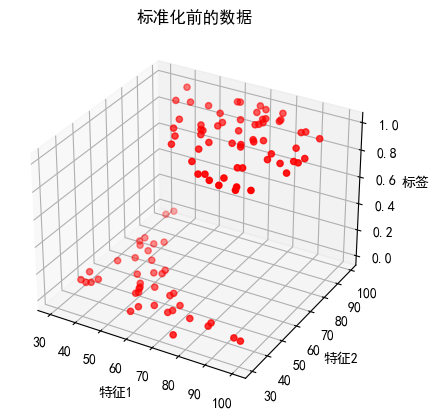

In [155]:
x=data['特征1'].values
y=data['特征2'].values
z=data['标签'].values

show3D(x,y,z,'标准化前的数据')

In [156]:

X_data = data.iloc[:,0:2]
y_data = data.iloc[:,2:3]

# 数据分割

In [157]:
#hold out
from sklearn.model_selection import train_test_split  
  
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# 数据标准化

In [158]:
mean1=X_train['特征1'].mean()
std1=X_train['特征1'].std()
mean2=X_train['特征2'].mean()
std2=X_train['特征2'].std()

X_train['特征1']=(X_train['特征1']-mean1)/std1
X_test['特征1']=(X_test['特征1']-mean1)/std1
X_train['特征2']=(X_train['特征2']-mean2)/std2
X_test['特征2']=(X_test['特征2']-mean2)/std2

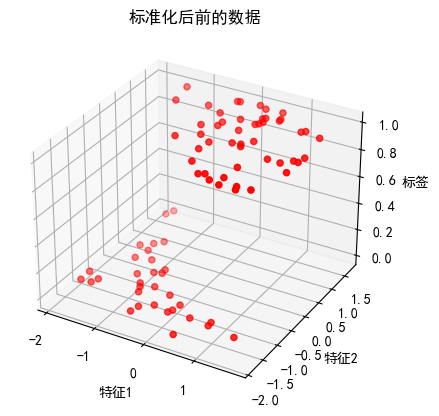

In [159]:
#数据
t=X_train.copy()
t['标签']=y_train

x=t['特征1'].values
y=t['特征2'].values
z=t['标签'].values
show3D(x,y,z,'标准化后前的数据')

In [160]:
#插入b
X_train.insert(0, 'Ones', 1)
X_test.insert(0, 'Ones', 1)

# sigmoid函数

In [161]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# loss函数

In [162]:
def computeCost(X,Y,W):
    P=sigmoid(X@W)
    loss = np.sum(-Y*np.log(P)-(1-Y)*np.log(1-P))/X.shape[1]
    return loss,P

# 梯度下降

In [163]:
def gradientDecent(W,X,Y,alpha):
    error=sigmoid(X@W)-Y
    grad=X.T@error/X.shape[0]
    W-=alpha*grad
    return W

# 逻辑回归

In [164]:
def logisticRegression(X,Y,alpha,iters):
    feature_dim=X.shape[1]
    W=np.zeros((feature_dim,1))
    loss_his=[]
    W_his=[]
    
    for i in range(iters):
        loss,P=computeCost(X,Y,W)
        loss_his.append(loss)
        
        W=gradientDecent(W,X,Y,alpha)
        t=W.copy()
        W_his.append(t)
        
    return loss_his,W_his

# 预测函数

In [165]:
def predict(W,X):
    probability = sigmoid(X@W)
    y_hat=probability>=0.5
    return probability,y_hat

# 训练

In [166]:
alpha =0.0001
iters=1000000

X=X_train.values
Y=y_train.values
loss_his_train,W_his=logisticRegression(X,Y,alpha,iters)

# 测试

In [167]:
from sklearn import metrics  
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc  

def evaluate(X,y,W):
    y_prob,y_pred=predict(W,X)
     
    precision = precision_score(y, y_pred)  
    print(f'Precision: {precision:.2f}')  
    
    recall = recall_score(y, y_pred)  
    print(f'Recall: {recall:.2f}')  
     
    f1 = f1_score(y, y_pred)  
    print(f'F1 Score: {f1:.2f}')  
     
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)  
    
    #绘制ROC曲线
    plt.figure(figsize = (5,5))
    plt.title('ROC_curve',fontsize=16)
    plt.plot(fpr,tpr)
    plt.plot(fpr,tpr,'ro')
    plt.ylabel('recall',fontsize = 16)
    plt.xlabel('fpr',fontsize = 16)
    print(f'AUC: {roc_auc:.2f}')

Precision: 0.92
Recall: 0.94
F1 Score: 0.93
AUC: 0.98


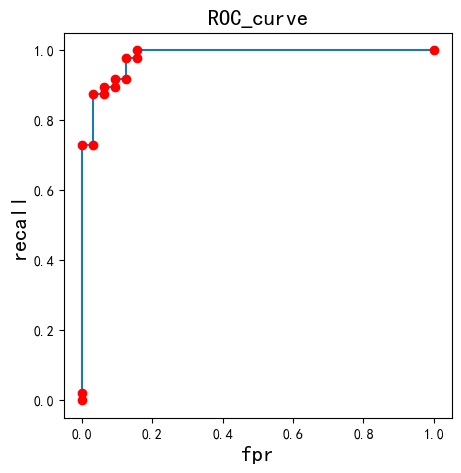

In [168]:
#train_set
X=X_train.values
Y=y_train.values
evaluate(X,Y,W_his[-1])

Precision: 0.90


Recall: 0.75
F1 Score: 0.82
AUC: 0.94


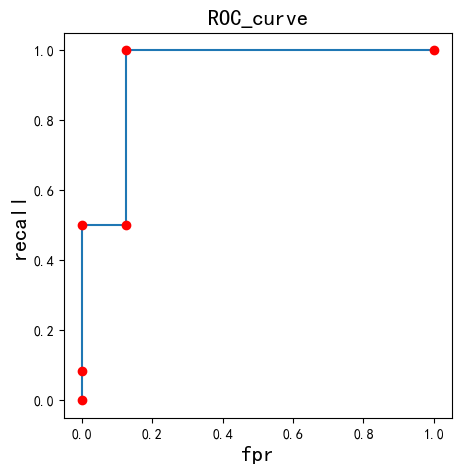

In [169]:
#test set
X=X_test.values
Y=y_test.values
y_test_prob=evaluate(X,Y,W_his[-1])

# loss变化

In [170]:
#利用train_set迭代的W算出在test_set的loss
loss_his_test=[]
X=X_test.values
Y=y_test.values
for i in range (iters):
    loss,p = computeCost(X,Y,W_his[i])
    loss_his_test.append(loss)

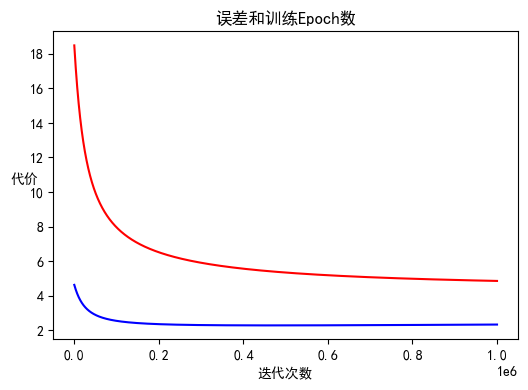

In [171]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his_train, 'r')
ax.plot(np.arange(iters), loss_his_test, 'b')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()